In [34]:
import matplotlib.pyplot as plt
import numpy as np
import json
import re

In [35]:
def get_train_rewards(npz_files):
    x = dict()
    for npz_filename in npz_files:
        x.update(dict(np.load(npz_filename)))
    return x

In [36]:
#x = get_train_rewards(["results/rewards/rewards_orig.npz", "results/rewards/rewards5.npz", "results/rewards/rewards6.npz", "results/rewards/rewards9.npz"])

In [40]:
"""
Used to combine the data since temperature was not included in the keys
x = get_train_rewards(["results/rewards/rewards_orig.npz", "results/rewards/rewards5.npz", "results/rewards/rewards6.npz", "results/rewards/rewards9.npz"])
new_x = dict()
for key, value in x.items():
    data = json.loads(key)
    data['temperature'] = 1.0
    new_x[re.sub(r"\s", "", json.dumps(data, sort_keys=True))] = value
x = get_train_rewards(["results/rewards/rewards7.npz"])
for key, value in x.items():
    data = json.loads(key)
    data['temperature'] = 2.0
    new_x[re.sub(r"\s", "", json.dumps(data, sort_keys=True))] = value
x = get_train_rewards(["results/rewards/rewards8.npz"])
for key, value in x.items():
    data = json.loads(key)
    data['temperature'] = 0.5
    new_x[re.sub(r"\s", "", json.dumps(data, sort_keys=True))] = value
"""

In [42]:
np.savez("results/rewards/rewards_combined.npz", **new_x)

In [81]:
#x = get_train_rewards(["results/rewards/rewards_combined.npz"])
x = get_train_rewards(["results_cp/rewards.npz"])

(40, 6000)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


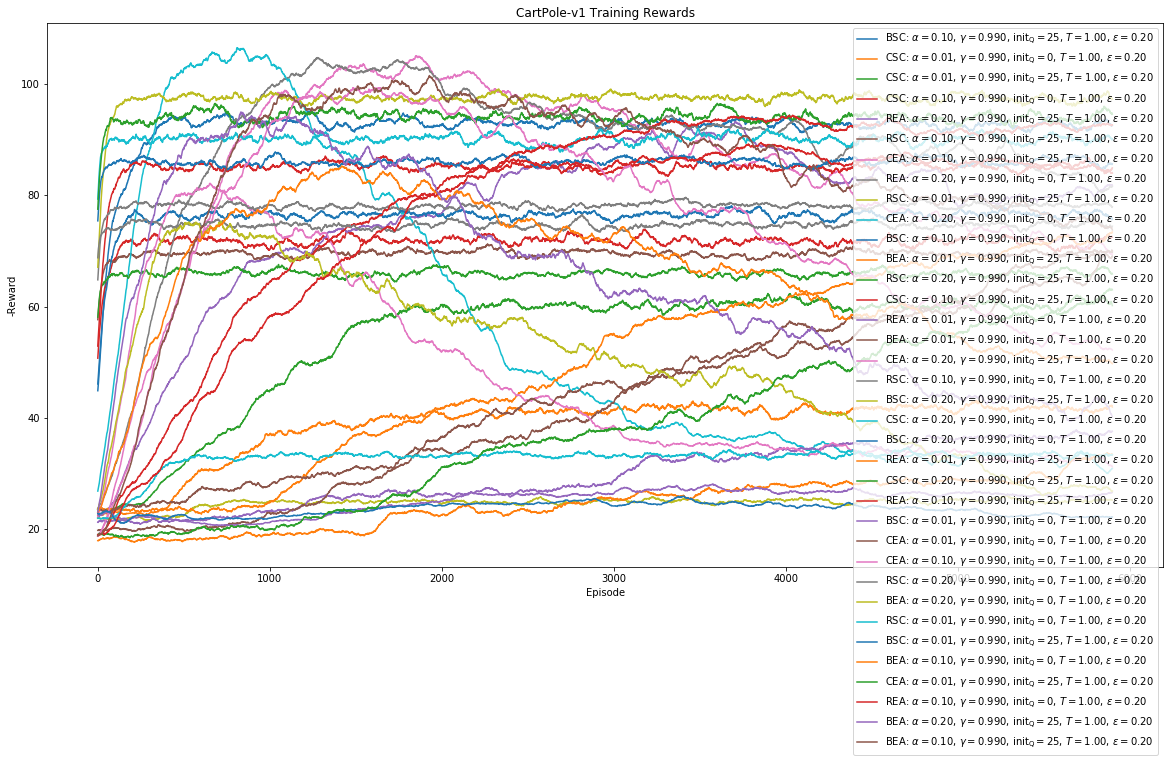

In [82]:
print(x[list(x)[0]].shape)
def moving_average(a, n):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
plt.figure(figsize=(20,10))
for key in x.keys():
    f = json.loads(key)
    data = np.mean(x[key], axis=0)
    #data = x[key][5, :]
    #print(x[key][:, 0])
    avg = moving_average(data, 100)
    temp = f.get('temperature') if f.get('temperature') is not None else 1
    epsilon = "" if f.get("epsilon") is None else r", $\epsilon=%.2f$"%f.get("epsilon")
    label = "%s: $\\alpha=%.2f$, $\\gamma=%.3f$, $\\mathrm{init}_{\\mathrm{Q}}=%d$, $T=%.2f$%s" % (f['agent'], f['alpha'], f['gamma'], f['init_Q'], f['temperature'], epsilon) 
    #if f['agent'] == 'R':
    plt.plot(np.arange(avg.shape[0]), avg, label=label)
plt.xlabel("Episode")

plt.ylabel("-Reward")
plt.title("%s Training Rewards" % f['environment'])
plt.legend()
plt.show()


In [84]:
test_rewards = np.load("results_cp/test_rewards.npz")
bellman = test_rewards[list(test_rewards)[0]]
consistent_bellman = test_rewards[list(test_rewards)[1]]
rso = test_rewards[list(test_rewards)[2]]
for arr in [bellman, consistent_bellman, rso]:
    print(np.mean(arr, axis=1))

[ 23.109 171.925  17.077  15.432  94.538  22.233  48.452 118.681 134.059
  68.46   16.049 156.45  183.188 113.38   15.361  42.099 186.585 186.178
 102.746 182.813  52.378  15.86  103.871  39.806  15.384 180.703 102.336
  84.645  95.678 107.422 138.346 120.864  65.692 187.041  15.955 155.858
  85.07   15.139 105.252 179.049]
[ 13.541  15.196 109.965  25.324  50.522  47.128  58.228  25.124  56.298
  23.376  15.395  49.389  15.29   51.129  25.016 185.259  15.382  15.37
  15.285  15.408  23.293  22.559  23.527  13.941  23.446 100.28   98.965
  44.468  55.214  47.158  69.177  40.933  21.752  16.181  13.499  87.764
  13.546  40.489  63.84   13.974]
[139.536  47.391  44.687 183.757 100.408  94.024  41.192 102.048 101.794
  40.088  93.145  41.559  84.964  51.112  21.33  172.981  95.584  36.739
  49.46   25.504  41.016  15.408  13.546  92.473  15.256  87.392  42.897
  98.792  42.988  25.05   41.824  89.982  95.463  13.557  21.206  15.412
  54.195  15.386  41.07   25.49 ]


In [6]:
print(data.shape)

(1000,)


In [85]:
qtable = np.load("qvalues.npz")

In [86]:
print(qtable[list(qtable.keys())[0]])

[[[-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]
  ...
  [-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]]

 [[-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]
  ...
  [-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]]

 [[-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]
  ...
  [-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]]

 [[-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]
  ...
  [-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]]

 [[-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]
  ...
  [-50. -50. -50.]
  [-50. -50. -50.]
  [-50. -50. -50.]]]


In [ ]:
import gym
import script
env = gym.make("LunarLander-v2")
qtable = np.load("qvalues.npz")
qtable = qtable[list(qtable.keys())[0]][0]
done = False
state = env.reset()
lunar_state_space = list(range(4**6 * 4))
max_steps = 200
lunar_discretization = script.Discretization(lunar_state_space, [np.array([-np.inf, -0.5, 0, 0.5, np.inf]) for i in range(6)] + [np.array([-0.1, 0.1, 1.5]) for i in range(2)])
the_state = env.reset()
total_reward = 0
for j in range(max_steps):
    env.render()
    discrete_state = lunar_discretization(the_state)
    #action = agent.decide(discrete_state)
    action = list(range(4))[np.argmax(qtable[discrete_state, :])]   # Greedy
    next_state, reward, done, info = env.step(action)
    discrete_next_state = lunar_discretization(next_state)
    total_reward += reward
    the_state = next_state
    if done:
        break
print(total_reward)

KeyboardInterrupt: 

In [31]:
print(list(qtable.keys()))

['{"agent":"B","alpha":0.01,"environment":"MountainCar-v0","epsilon":null,"gamma":0.999,"init_Q":-50,"temperature":1}']
